In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import pickle
import librosa
import torchaudio

dataset = pickle.load(open("../data/train.pkl", 'rb'))


/Users/georgeherbert/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def create_mel(wave):
    transform = torchaudio.transforms.MelSpectrogram(
        sample_rate=22050,
        n_fft=1024,
        n_mels=80,
        power=1,
    )
    
    mel = transform(torch.Tensor(wave))
    mel = (1000 * mel + 1).log().numpy()
    time_intervals = mel.shape[1]
    mel = mel[:, :min(time_intervals, 80)]
    padding_right = max(0, 80 - time_intervals)
    mel = np.pad(
        mel,
        [[0, 0], [0, padding_right]],
        mode='edge',
    )
    return torch.Tensor([mel])

def draw_mel(mel):
    plt.matshow(mel.numpy())
    plt.show()


def draw_wave(wave):
    plt.plot([i for i in range(len(wave))], wave)
    plt.show()


<class 'str'>
<class 'torch.Tensor'> torch.Size([1, 80, 80])
<class 'int'>
<class 'numpy.ndarray'> (20505,)
blues.00000.wav 0


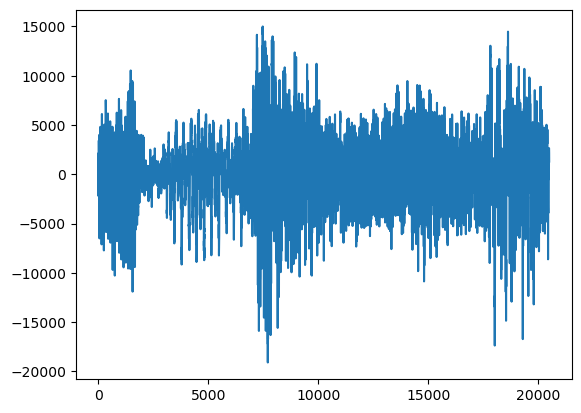

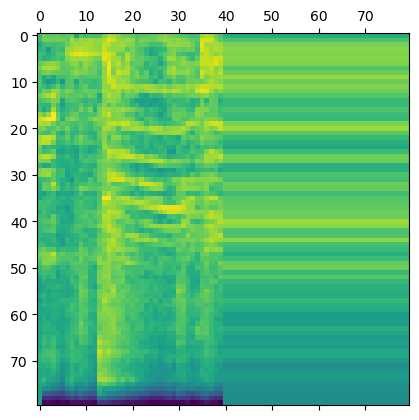

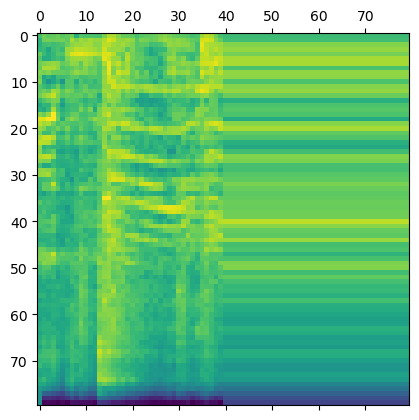

tensor(39982.0781)


In [10]:
sample = dataset[3]

print(type(sample[0]))
print(type(sample[1]), sample[1].shape)
print(type(sample[2]))
print(type(sample[3]), sample[3].shape)

file = sample[0]
mel = sample[1][0]
label = sample[2] 
wave = sample[3]

print(file, label)

draw_wave(wave)
draw_mel(mel)

new_wave = wave
# new_wave = librosa.effects.time_stretch(
#     sample[3],
#     rate=1.1
# )
# new_wave = torchaudio.functional.pitch_shift(torch.Tensor(wave), sample_rate=22050, n_steps=0)
# new_wave = librosa.effects.time_stretch(wave, rate = 0.2)
new_wave = librosa.effects.pitch_shift(new_wave, sr = 22050, n_steps = 0, bins_per_octave = 12)
new_mel = create_mel(new_wave)

draw_mel(new_mel[0])

print((mel - new_mel[0]).abs().sum())